<a href="https://colab.research.google.com/github/datascienceforus/GPCR_Py/blob/master/GPCR_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install pycaret

     |████████████████████████████████| 194kB 15.0MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 7.0MB 41.6MB/s 
     |████████████████████████████████| 1.6MB 57.0MB/s 
     |████████████████████████████████| 63.9MB 121kB/s 
     |████████████████████████████████| 389kB 54.7MB/s 
     |████████████████████████████████| 133kB 56.9MB/s 
     |████████████████████████████████| 1.2MB 48.6MB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
     |████████████████████████████████| 3.0MB 48.7MB/s 
     |████████████████████████████████| 266kB 64.7MB/s 
     |████████████████████████████████| 235kB 42.6MB/s 
     |████████████████████████████████| 552kB 55.9MB/s 
     |████████████████████████████████| 614kB 54.2MB/s 
     |████████████████████████████████| 2.1MB 44.0MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 51kB 8.0MB/s

In [0]:
from pycaret.classification import *

In [0]:
import pandas as pd

In [0]:
gpcr_data = pd.read_csv("GPCR4_12.csv")

In [9]:
gpcr_data

,AA,RA,NA,DA,CA,EA,QA,GA,HA,IA,LA,KA,MA,FA,PA,SA,TA,WA,YA,VA,AR,RR,NR,DR,CR,ER,QR,GR,HR,IR,LR,KR,MR,FR,PR,SR,TR,WR,YR,VR,...,SpAD_D,SpMAD_D,EE_D,VE1_D,VE2_D,VE3_D,VR1_D,VR2_D,VR3_D,TopoPSA,VAdjMat,MWC2,MWC3,MWC4,MWC5,MWC6,MWC7,MWC8,MWC9,MWC10,TWC,SRW2,SRW3,SRW4,SRW5,SRW6,SRW7,SRW8,SRW9,SRW10,TSRW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,Zagreb,Classlabel
0,0.000000,0.000000,0.002933,0.002933,0.000000,0.000000,0.002933,0.002933,0.000000,0.002933,0.002933,0.000000,0.000000,0.002933,0.000000,0.005865,0.002933,0.002933,0.000000,0.000000,0.002933,0.000000,0.005865,0.002933,0.000000,0.000000,0.000000,0.000000,0.000000,0.002933,0.002933,0.000000,0.002933,0.002933,0.005865,0.000000,0.011730,0.000000,0.002933,0.002933,...,0.027728,0.086393,0.036519,0.023143,0.035872,0.981705,0.066319,0.091416,0.091688,0.152864,0.293936,0.361894,0.416591,0.437283,0.473347,0.492553,0.519597,0.542658,0.565939,0.580649,0.177077,0.347066,0.0,0.365701,0.583305,0.394140,0.752946,0.462199,0.815264,0.519179,0.519801,0.113031,0.607147,0.259320,0.112625,0.432169,0.006423,0.142857,0.130682,Interactive
1,0.015590,0.013363,0.002227,0.000000,0.002227,0.004454,0.004454,0.008909,0.000000,0.006682,0.020045,0.000000,0.000000,0.002227,0.004454,0.006682,0.004454,0.004454,0.000000,0.004454,0.002227,0.015590,0.002227,0.002227,0.002227,0.000000,0.000000,0.004454,0.000000,0.000000,0.006682,0.006682,0.000000,0.006682,0.008909,0.006682,0.004454,0.002227,0.000000,0.000000,...,0.077722,0.205292,0.102365,0.423060,0.436903,0.993088,0.151489,0.143795,0.189265,0.202197,0.465878,0.514469,0.546616,0.553526,0.574667,0.583040,0.599181,0.612655,0.627240,0.633785,0.281700,0.513267,0.0,0.514786,0.000000,0.520442,0.431320,0.557671,0.619369,0.588276,0.582127,0.223016,0.756914,0.180812,0.169325,0.104500,0.024058,0.248120,0.232955,Interactive
2,0.008715,0.010893,0.002179,0.000000,0.002179,0.002179,0.004357,0.002179,0.000000,0.000000,0.021786,0.004357,0.002179,0.000000,0.004357,0.004357,0.002179,0.004357,0.002179,0.004357,0.004357,0.004357,0.002179,0.004357,0.006536,0.004357,0.000000,0.004357,0.002179,0.000000,0.000000,0.010893,0.000000,0.004357,0.008715,0.002179,0.002179,0.004357,0.004357,0.000000,...,0.146382,0.358711,0.192795,1.000000,0.834122,0.998560,0.144771,0.100531,0.242185,0.133325,0.556446,0.554614,0.570477,0.563206,0.574667,0.574618,0.585418,0.594413,0.606500,0.611176,0.334707,0.576042,0.0,0.548804,0.000000,0.537701,0.000000,0.563493,0.000000,0.588385,0.581597,0.288287,0.629055,0.148618,0.181659,0.109074,0.053261,0.255639,0.267045,Interactive
3,0.023923,0.014354,0.002392,0.007177,0.011962,0.000000,0.002392,0.016746,0.000000,0.000000,0.011962,0.004785,0.002392,0.000000,0.016746,0.011962,0.004785,0.002392,0.000000,0.011962,0.002392,0.016746,0.004785,0.004785,0.002392,0.004785,0.002392,0.009569,0.000000,0.000000,0.004785,0.000000,0.002392,0.007177,0.011962,0.002392,0.002392,0.000000,0.000000,0.004785,...,0.147692,0.343479,0.194519,0.735202,0.590535,0.994917,0.312374,0.246511,0.292398,0.164060,0.572450,0.608126,0.627446,0.627157,0.639447,0.642298,0.652511,0.661268,0.671731,0.674510,0.369214,0.617393,0.0,0.605664,0.000000,0.601446,0.000000,0.627072,0.000000,0.649801,0.643540,0.318961,0.845946,0.235692,0.000000,0.347816,0.055848,0.278195,0.318182,Interactive
4,0.008602,0.002151,0.006452,0.000000,0.004301,0.000000,0.000000,0.002151,0.000000,0.004301,0.010753,0.002151,0.002151,0.000000,0.006452,0.002151,0.002151,0.004301,0.002151,0.008602,0.002151,0.000000,0.002151,0.002151,0.000000,0.000000,0.000000,0.002151,0.000000,0.002151,0.000000,0.002151,0.002151,0.000000,0.002151,0.006452,0.004301,0.000000,0.000000,0.002151,...,0.082364,0.243469,0.108244,0.347806,0.377146,0.992215,0.086954,0.074655,0.158282,0.068794,0.445188,0.477613,0.506126,0.515601,0.535726,0.546287,0.563221,0.579395,0.596029,0.605653,0.257943,0.477745,0.0,0.477580,0.583305,0.483426,0.788205,0.526293,0.852335,0.563002,0.570478,0.200292,0.614726,0.110194,0.125612,0.118631,0.023999,0.187970,0.204545,Interactive
...,...,...,...,..

In [0]:
gpcr_data.isnull().sum()

AA            0
RA            0
NA            0
DA            0
CA            0
             ..
WTPT.5        0
WPATH         0
WPOL          0
Zagreb        0
Classlabel    0
Length: 807, dtype: int64

In [10]:
gpcr_set = setup(data= gpcr_data, target = 'Classlabel')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,2331
1,Target Type,Binary
2,Label Encoded,"Interactive: 0, NonInteractive: 1"
3,Original Data,"(1616, 807)"
4,Missing Values,False
5,Numeric Features,789
6,Categorical Features,17
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [11]:
compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.885100,0.946800,0.883500,0.888200,0.885000,0.770200
1,Extra Trees Classifier,0.877100,0.938500,0.883600,0.872900,0.877500,0.754300
2,Light Gradient Boosting Machine,0.866500,0.932500,0.872800,0.864300,0.867700,0.733000
3,Gradient Boosting Classifier,0.844400,0.916800,0.841000,0.848000,0.844000,0.688800
4,Extreme Gradient Boosting,0.835500,0.914900,0.834000,0.838400,0.835100,0.671100
5,Random Forest Classifier,0.828400,0.901000,0.796600,0.852300,0.822900,0.656900
6,Ada Boost Classifier,0.788700,0.853700,0.793300,0.787900,0.789600,0.577400
7,Linear Discriminant Analysis,0.763000,0.801100,0.793300,0.748300,0.769400,0.526100
8,Decision Tree Classifier,0.751500,0.751300,0.733000,0.762800,0.745700,0.502800
9,Naive Bayes,0.693200,0.767300,0.602300,0.736200,0.660500,0.386500


In [0]:
catboost_model = create_model('catboost')

In [25]:
tuned_catboost_model = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8772,0.9581,0.8421,0.9057,0.8727,0.7544
1,0.9115,0.9759,0.8947,0.9273,0.9107,0.8231
2,0.8407,0.9458,0.8246,0.8545,0.8393,0.6815
3,0.8850,0.9546,0.8596,0.9074,0.8829,0.7700
4,0.8850,0.9483,0.8596,0.9074,0.8829,0.7700
5,0.9115,0.9677,0.9123,0.9123,0.9123,0.8230
6,0.8761,0.9261,0.8750,0.8750,0.8750,0.7522
7,0.8407,0.9160,0.8214,0.8519,0.8364,0.6813
8,0.8407,0.9110,0.8929,0.8065,0.8475,0.6817
9,0.9292,0.9665,0.9821,0.8871,0.9322,0.8585


In [26]:
#Plot_model doesnt work for catboost, extra-trees and lightgbm. Hence, executed the xgboost algorithm.
plot_model(tuned_catboost_model)

SystemExit: ignored

In [30]:
tuned_xgboost_model = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8509,0.9243,0.8070,0.8846,0.8440,0.7018
1,0.8761,0.9458,0.8421,0.9057,0.8727,0.7523
2,0.8319,0.9267,0.8246,0.8393,0.8319,0.6637
3,0.8761,0.9424,0.8772,0.8772,0.8772,0.7522
4,0.8673,0.9389,0.8596,0.8750,0.8673,0.7345
5,0.8850,0.9499,0.9123,0.8667,0.8889,0.7698
6,0.8496,0.9063,0.8571,0.8421,0.8496,0.6991
7,0.8142,0.8590,0.8214,0.8070,0.8142,0.6283
8,0.8407,0.9051,0.8929,0.8065,0.8475,0.6817
9,0.8673,0.9355,0.9286,0.8254,0.8739,0.7348


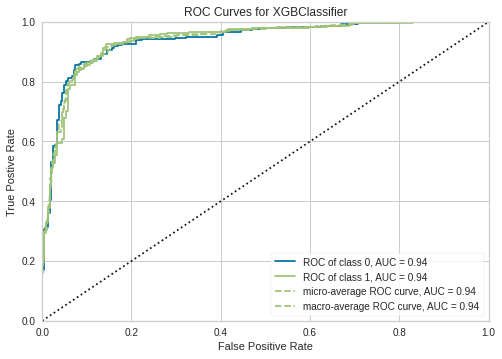

In [31]:
plot_model(tuned_xgboost_model, plot= 'auc')

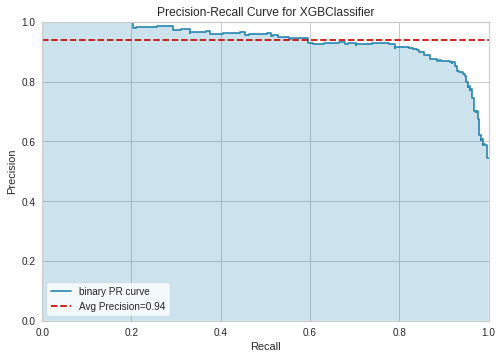

In [32]:
plot_model(tuned_xgboost_model, plot= 'pr')

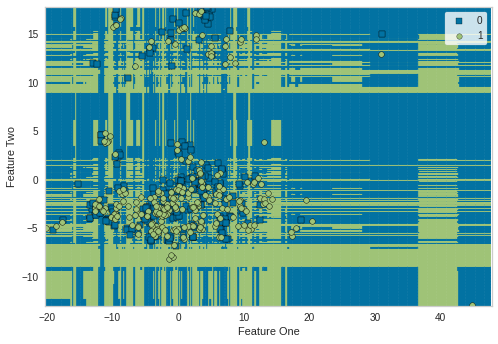

In [34]:
plot_model(tuned_xgboost_model, plot= 'boundary')

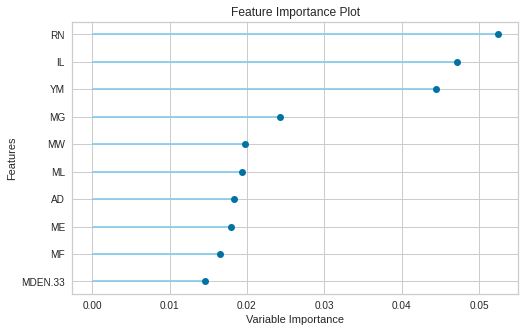

In [35]:
plot_model(tuned_xgboost_model, plot= 'feature')

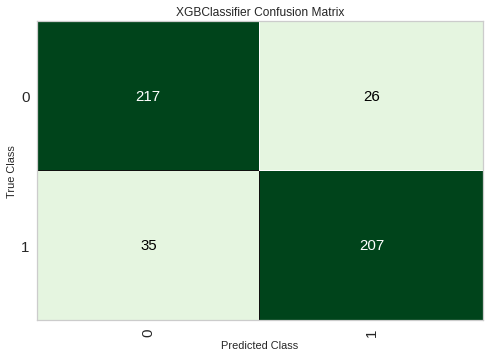

In [38]:
plot_model(tuned_xgboost_model, plot='confusion_matrix')

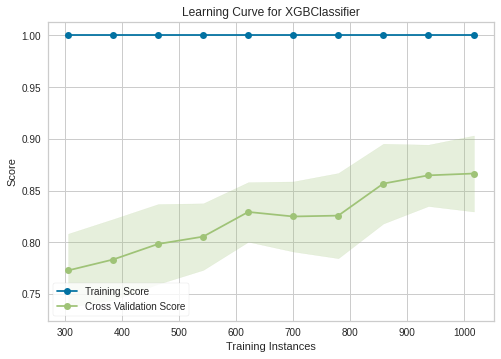

In [39]:
plot_model(tuned_xgboost_model, plot='learning')

In [40]:
plot_model(tuned_xgboost_model, plot='parameter')


,Parameters
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,0.7
gamma,0
learning_rate,0.6
max_delta_step,0
max_depth,60
min_child_weight,2


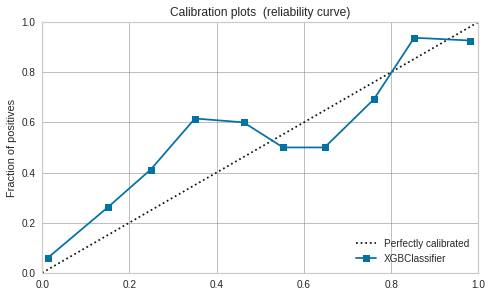

In [41]:
plot_model(tuned_xgboost_model, plot='calibration')

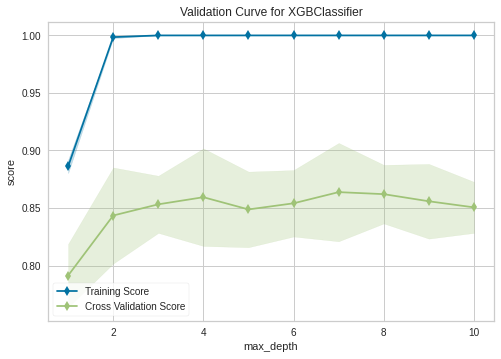

In [42]:
plot_model(tuned_xgboost_model, plot='vc')

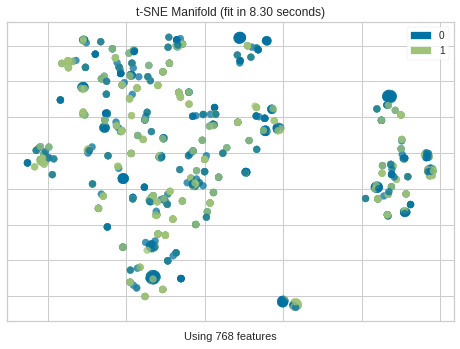

In [43]:
plot_model(tuned_xgboost_model, plot='manifold')

In [0]:
plot_model(tuned_xgboost_model, plot='rfe')

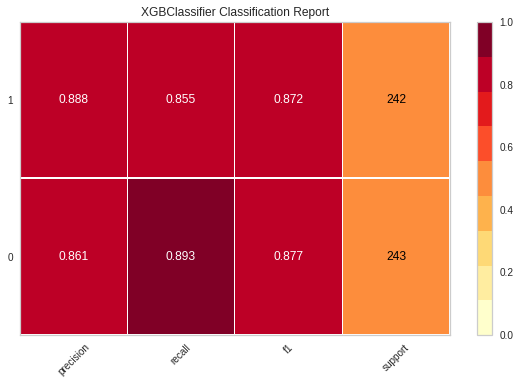

In [47]:
plot_model(tuned_xgboost_model, plot='class_report')

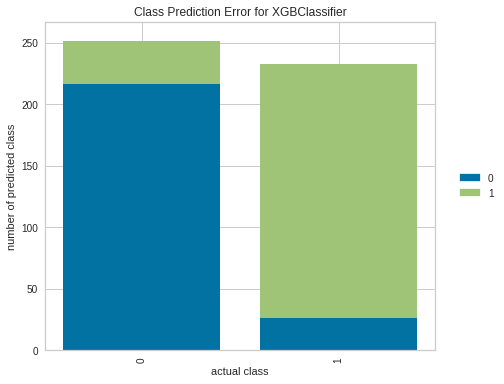

In [48]:
plot_model(tuned_xgboost_model, plot='error')

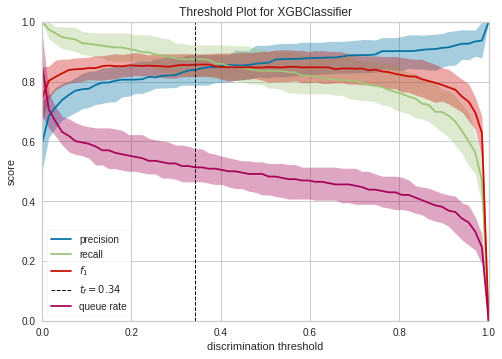

In [49]:
plot_model(tuned_xgboost_model, plot='threshold')

In [51]:
predict_model(tuned_xgboost_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.8742,0.9402,0.8554,0.8884,0.8716,0.7484


,AA,RA,NA,DA,CA,EA,QA,GA,HA,IA,LA,KA,MA,FA,PA,SA,TA,WA,YA,VA,AR,RR,NR,DR,CR,ER,QR,GR,HR,IR,LR,KR,MR,FR,PR,SR,TR,WR,YR,VR,...,SpAD_D,SpMAD_D,EE_D,VE1_D,VE2_D,VE3_D,VR1_D,VR2_D,VR3_D,TopoPSA,VAdjMat,MWC2,MWC6,SRW2,SRW5,SRW6,SRW7,SRW9,SRW10,WTPT.2,WTPT.3,WTPT.5,WPATH,WPOL,nI.1_1,C1SP1_1,khs.dCH2_1,khs.tCH_0,n4Ring_1,nF7Ring_1,nF8Ring_1,nT4Ring_0,n3HeteroRing_0,n8HeteroRing_1,nF8HeteroRing_1,nT7HeteroRing_1,nT8HeteroRing_1,Classlabel,Label,Score
0,0.008230,0.002058,0.000000,0.004115,0.000000,0.000000,0.002058,0.006173,0.000000,0.002058,0.000000,0.004115,0.004115,0.000000,0.000000,0.002058,0.006173,0.000000,0.004115,0.006173,0.000000,0.002058,0.006173,0.004115,0.000000,0.004115,0.000000,0.002058,0.002058,0.002058,0.008230,0.006173,0.000000,0.000000,0.000000,0.006173,0.002058,0.000000,0.004115,0.006173,...,0.129963,0.305047,0.171169,0.260816,0.217552,0.984671,0.283278,0.230541,0.275107,0.393094,0.556446,0.585227,0.609529,0.590307,0.835342,0.564306,0.898039,0.903376,0.571932,0.670508,0.435333,0.608146,0.048027,0.218045,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1,0.5802
1,0.000000,0.002801,0.002801,0.005602,0.000000,0.000000,0.005602,0.002801,0.000000,0.002801,0.022409,0.000000,0.005602,0.016807,0.002801,0.005602,0.002801,0.000000,0.008403,0.002801,0.008403,0.019608,0.000000,0.000000,0.002801,0.005602,0.002801,0.008403,0.002801,0.005602,0.011204,0.000000,0.002801,0.000000,0.000000,0.014006,0.002801,0.002801,0.000000,0.000000,...,0.159089,0.422803,0.209531,0.241837,0.209790,0.984796,0.495328,0.448702,0.290073,0.248051,0.539814,0.514469,0.484772,0.545887,0.583305,0.455892,0.771549,0.832296,0.443348,0.528803,0.166606,0.000000,0.054896,0.180451,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.1779
2,0.005038,0.007557,0.002519,0.002519,0.000000,0.000000,0.000000,0.000000,0.000000,0.005038,0.010076,0.002519,0.000000,0.002519,0.002519,0.005038,0.002519,0.002519,0.000000,0.010076,0.002519,0.000000,0.002519,0.000000,0.002519,0.002519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005038,0.005038,0.002519,0.007557,0.000000,0.000000,0.002519,0.000000,...,0.080323,0.198559,0.105790,0.555449,0.547551,0.994785,0.158861,0.143237,0.202220,0.130133,0.485605,0.548198,0.631022,0.545887,0.583305,0.554223,0.752946,0.819755,0.613177,0.875340,0.106445,0.109549,0.026021,0.255639,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,1,0.9980
3,0.008489,0.008489,0.001698,0.003396,0.001698,0.003396,0.005093,0.000000,0.000000,0.003396,0.013582,0.003396,0.000000,0.001698,0.001698,0.005093,0.005093,0.003396,0.001698,0.001698,0.000000,0.003396,0.003396,0.001698,0.000000,0.001698,0.001698,0.001698,0.000000,0.000000,0.000000,0.016978,0.000000,0.001698,0.000000,0.003396,0.005093,0.001698,0.001698,0.000000,...,0.184145,0.396006,0.242531,0.181634,0.131304,0.976853,0.347536,0.245625,0.335764,0.315616,0.617130,0.629778,0.630448,0.642758,0.740602,0.600691,0.841473,0.865047,0.595914,0.688610,0.287298,0.227005,0.076516,0.263158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,0.0581
4,0.007969,0.002126,0.005218,0.002548,0.001351,0.003110,0.003959,0.005076,0.000623,0.001966,0.011274,0.005570,0.000182,0.000627,0.002273,0.005815,0.011429,0.001346,0.003440,0.004259,0.004251,0.002538,0.005553,0.005006,0.002595,0.000611,0.000000,0.001807,0.000000,0.000135,0.004456,0.006758,0.000000,0.005266,0.002572,0.003880,0.000682,0.001434,0.003960,0.002434,...,0.077862,0.274435,0.115386,0.080274,0.080124,0.976076,0.143597,0.201488,0.179335,0.208540,0.427293,0.431006,0.510854,0.498674,0.647755,0.398940,0.756308,0.848508,0.389734,0.585869,0.272572,0.416947,0.026699,0.131302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0.0043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4

In [0]:
xgboost_final= finalize_model(tuned_xgboost_model)

In [53]:
xgboost_final

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=60,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=2331,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=0)

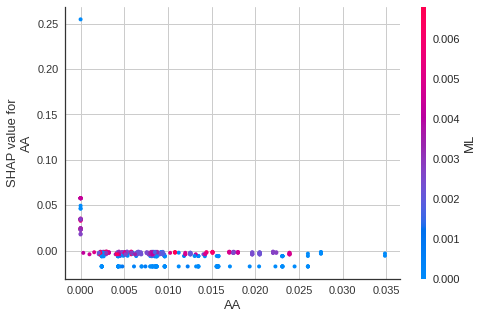

In [54]:
interpret_model(tuned_xgboost_model, plot= 'correlation')

In [55]:
save_model(tuned_xgboost_model, 'xgboost_model')

Transformation Pipeline and Model Succesfully Saved


In [56]:
!ls

catboost_info  cb_model.json  GPCR4_12.csv  sample_data  xgboost_model.pkl


In [57]:
load_xgboost = load_model('xgboost_model')

Transformation Pipeline and Model Sucessfully Loaded


In [58]:
load_xgboost

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Classlabel', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical...
                 ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                 ('P_transform', Empty()), ('pt_target', Empty()),
                 ('binn', Empty()), ('rem_outliers', Empty()),
                 ('cluster_all', Empty()),
                 ('dummy', Dummify(target='Classlabel')),
                 ('fix_perfect', Remove_100(target='Classlabel')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs', Empty()), ('pca', Empty())],
          verbose=False),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.7, gamma=0,
               learning_rate=0.6, max_delta_step=0, max_depth=60,
               min_child_weight=2, missing=nan, n_estimators=100, n_jobs=-1,
               nthread=None, objective='binary:logistic', random_state=2331,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.9, verbosity=0)]

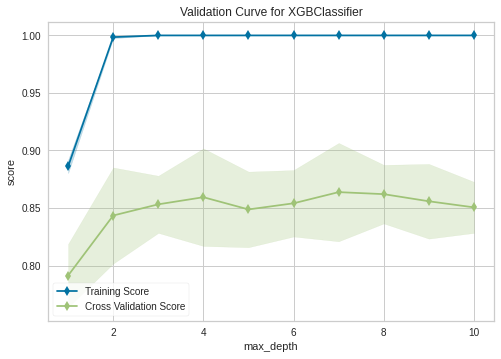

In [60]:
evaluate_model(tuned_xgboost_model)